<a href="https://colab.research.google.com/github/pranavnagasai/Traffic_Sign_Recognition/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from google.colab.patches import cv2_imshow
DATA_DIR = "/kaggle/input/gtsrb-german-traffic-sign/Train"

IMG_SIZE = 32
NUM_CLASSES = 43

data = []
labels = []

for class_id in range(NUM_CLASSES):
    path = os.path.join(DATA_DIR, str(class_id))
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            data.append(image)
            labels.append(class_id)
        except:
            pass

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 53s 103ms/step - accuracy: 0.2156 - loss: 2.9446 - val_accuracy: 0.7897 - val_loss: 0.8203
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.7454 - loss: 0.8146 - val_accuracy: 0.9332 - val_loss: 0.2713
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.8963 - loss: 0.3465 - val_accuracy: 0.9707 - val_loss: 0.1135
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 85s 98ms/step - accuracy: 0.9368 - loss: 0.2103 - val_accuracy: 0.9804 - val_loss: 0.0840
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.9548 - loss: 0.1570 - val_accuracy: 0.9850 - val_loss: 0.0611
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9639 - loss: 0.1207 - val_accuracy: 0.9860 - val_loss: 0.0454
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9725 - loss: 0.0942 - val_accuracy: 0.9902 - val_loss: 0.0399
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 48s 97ms/step - accuracy: 0.9740 - loss: 0.0858 

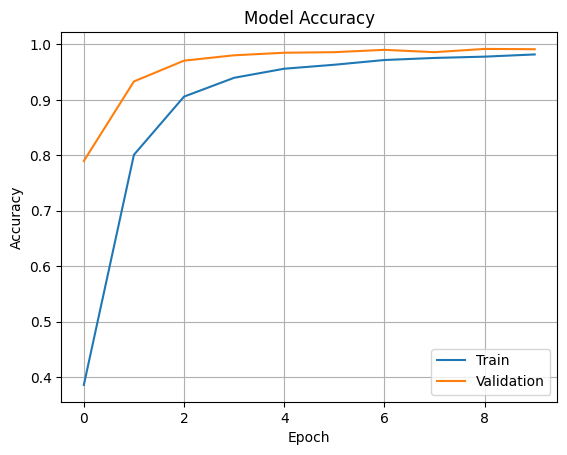

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.99      0.99       496
           2       0.99      0.97      0.98       450
           3       0.98      0.98      0.98       280
           4       0.99      1.00      0.99       418
           5       0.96      0.99      0.97       364
           6       1.00      1.00      1.00        59
           7       1.00      0.99      0.99       278
           8       0.99      0.99      0.99       301
           9       1.00      1.00      1.00       268
          10       0.99      1.00      1.00       370
          11       0.98      0.99      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      0.99      0.99       162
          15       0.98      1.00      0.99       120
          16    

In [ ]:

data = np.array(data)
labels = np.array(labels)

data = data / 255.0
labels = to_categorical(labels, NUM_CLASSES)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted class ID: 25
original image:


predicted class:


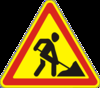

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
original_image = cv2.imread('/content/Test/00183.png')
image = cv2.resize(original_image, (32, 32))
image = image / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print(f"Predicted class ID: {predicted_class}")
image = cv2.resize(original_image, (128, 128))
print("original image:")
cv2_imshow(cv2.imread('/content/Test/00183.png'))
print("predicted class:")
cv2_imshow(cv2.imread(f'/content/meta_data/{predicted_class}.png'))